In [ ]:
using ElectromagneticFields

In [ ]:
using Makie

In [ ]:
# ITER parameters
const R0 =  6.2
const B0 =  5.3
const ϵ  =  0.32
const κ  =  1.8
const δ  =  0.45
const a  = -0.155
;

In [ ]:
eq = Solovev(R0, B0, ϵ, κ, δ, a)

In [ ]:
load_equilibrium(eq)

In [6]:
nr = 100
nz = 120
nl = 10
;

In [7]:
rgrid = LinRange( 3.0,  9.0, nr)
zgrid = LinRange(-5.0, +5.0, nz)
;

In [8]:
xgrid = rgrid ./ R0
ygrid = zgrid ./ R0
;

In [9]:
field = zeros((nr,nz))
potAR = zeros((nr,nz))
potAZ = zeros((nr,nz))
potAP = zeros((nr,nz))
;

In [10]:
for i in 1:nr
    for j in 1:nz
        field[i,j] = B(xgrid[i], ygrid[j], 0.0)
        potAR[i,j] = A₁(xgrid[i], ygrid[j], 0.0)
        potAZ[i,j] = A₂(xgrid[i], ygrid[j], 0.0)
        potAP[i,j] = A₃(xgrid[i], ygrid[j], 0.0)
    end
end

In [12]:
# compute separatrix for comparison
τ = LinRange(0, 2π, 200)
boundary_X = 1 .+ ϵ .* cos.(τ .+ asin(δ) .* sin.(τ) )
boundary_Y = ϵ .* κ .* sin.(τ)
;

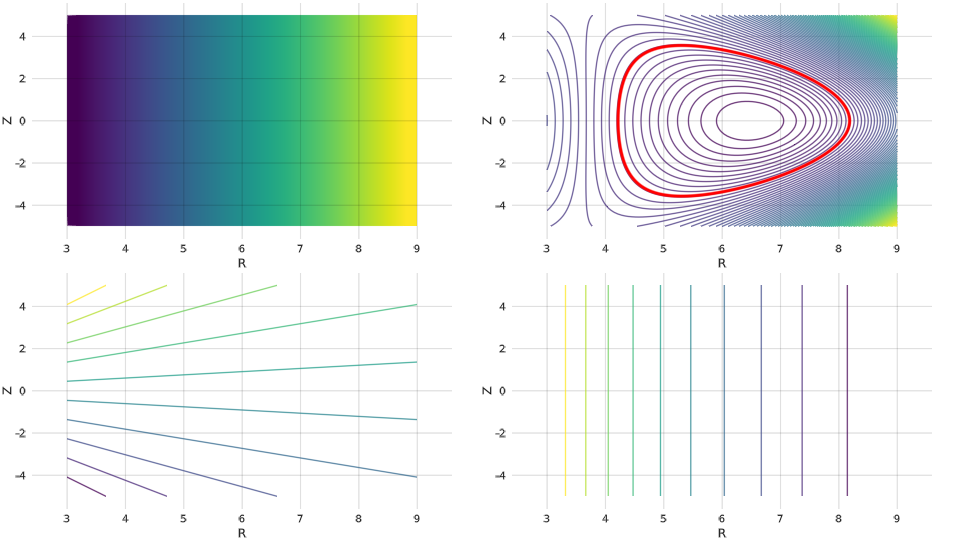

In [37]:
axis = (names = (axisnames = ("R", "Z"),),)
scene = hbox(
    vbox(
        contour(rgrid, zgrid, potAR, axis=axis, levels=nl),#L"$A_R(R,Z)$"
        contour(rgrid, zgrid, potAZ, axis=axis, levels=nl) #L"$A_Z(R,Z)$"
    ),
    vbox(
        contour(rgrid, zgrid, field, axis=axis, levels=nl, linewidth=0, fillrange=true),#L"$B(R,Z)$"
        contour(rgrid, zgrid, potAP, axis=axis, levels=100)#L"$A_\phi(R,Z)$"
    )
)
lines!(scene.children[2].children[2], boundary_X.*R0, boundary_Y.*R0, color=:red, linewidth=3)
scene